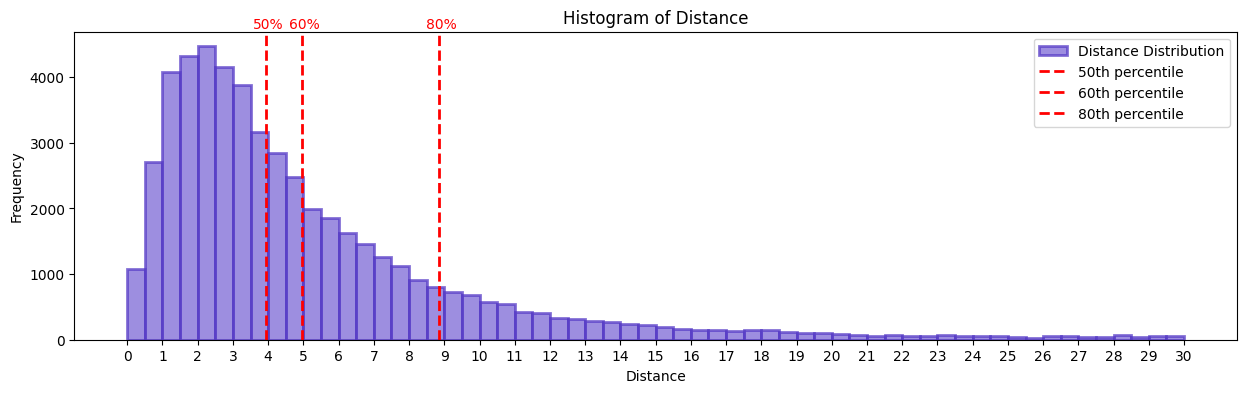

In [20]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

def extract_numbers_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        numbers = [float(re.search(r'\d+(\.\d+)?', line).group()) for line in lines if re.search(r'\d+(\.\d+)?', line)]
        # 过滤掉大于 50 的数字
        numbers = [num for num in numbers if num <= 80]
    return numbers

def extract_numbers_from_folder(folder_path):
    all_numbers = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            all_numbers.extend(extract_numbers_from_file(file_path))
    return all_numbers

def plot_histogram(numbers, bin_width=0.5, max_value=30):
    plt.figure(figsize=(15, 4))  # 调整 figsize 参数以设置图像的大小

    
    
    bins = np.arange(0, max_value + bin_width, bin_width)
    plt.hist(numbers, bins=bins, color='#745ed4', edgecolor='#5034c4', alpha=0.7, label='Distance Distribution', linewidth=2)
    
    percentiles = [50, 60, 80]
    for percentile in percentiles:
        value = np.percentile(numbers, percentile)
        plt.axvline(value, color='red', linestyle='--', label=f'{percentile}th percentile', linewidth=2)
        plt.text(value+0.5, plt.ylim()[1] * 1.01, f'{percentile}%', color='red', ha='right')


    plt.xticks(np.arange(0, max_value + 1, 1))

    
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Histogram of Distance')
    plt.legend()
    plt.show()

folder_path = 'D:\MyFolders\project\CANN\SiamFC_CANN_v2\siamfc-pytorch\\results\OTB2015\SiamFC\center_errors'  # 修改为你的文件夹路径
numbers = extract_numbers_from_folder(folder_path)
plot_histogram(numbers)
